<a href="https://colab.research.google.com/github/damerei/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_3_Data_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

# Data Storytelling

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style



url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [164]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 25.0MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [1]:
import seaborn as sns
sns.__version__

'0.9.0'

In [7]:
df.shape

df.head()



,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [0]:
year = df['Year']

occupation = df['Occupation']

In [11]:
pd.crosstab(occupation, year, normalize='columns')

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Occupation,,,,,,,,,,,,,,,,,
"Acting, Comedy & Music",0.903614,0.739645,0.726115,0.622642,0.560241,0.384146,0.370370,0.360248,0.255319,0.207317,0.208589,0.351515,0.337423,0.268293,0.427711,0.392638,0.45
Government and Politics,0.012048,0.082840,0.038217,0.069182,0.102410,0.225610,0.160494,0.192547,0.170213,0.201220,0.208589,0.181818,0.165644,0.201220,0.126506,0.128834,0.17
Media,0.066265,0.124260,0.197452,0.264151,0.246988,0.274390,0.333333,0.291925,0.333333,0.469512,0.361963,0.303030,0.312883,0.317073,0.307229,0.325153,0.24
Other,0.018072,0.053254,0.038217,0.044025,0.090361,0.115854,0.135802,0.155280,0.241135,0.121951,0.220859,0.163636,0.184049,0.213415,0.138554,0.153374,0.14


In [0]:
oby = pd.crosstab(year, occupation, normalize='index')



In [12]:
oby['Acting, Comedy & Music']

Year
1999    0.903614
2000    0.739645
2001    0.726115
2002    0.622642
2003    0.560241
2004    0.384146
2005    0.370370
2006    0.360248
2007    0.255319
2008    0.207317
2009    0.208589
2010    0.351515
2011    0.337423
2012    0.268293
2013    0.427711
2014    0.392638
2015    0.450000
Name: Acting, Comedy & Music, dtype: float64

# Part 2 — Recreate this explanatory visualization:

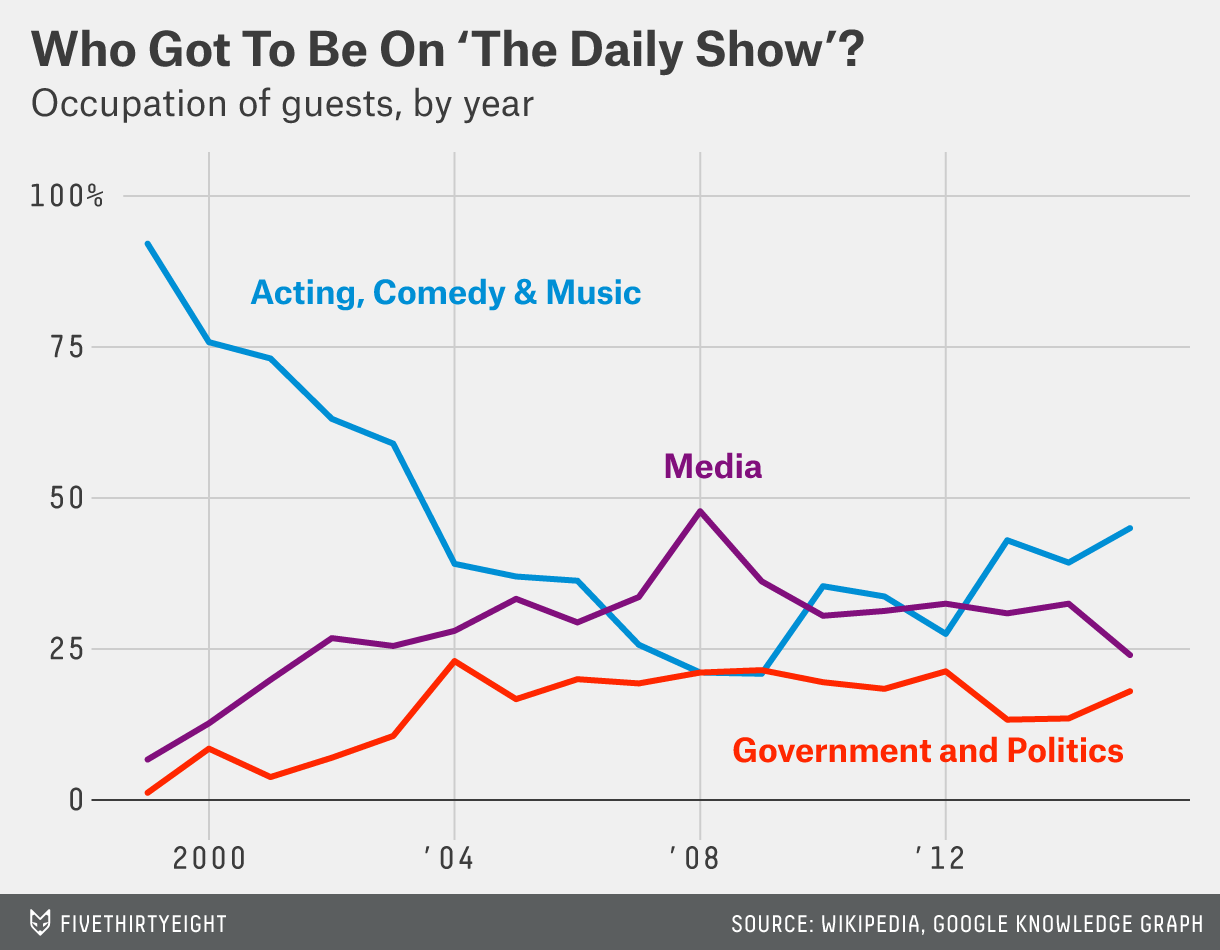

In [13]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

In [14]:
oby['Other']

Year
1999    0.018072
2000    0.053254
2001    0.038217
2002    0.044025
2003    0.090361
2004    0.115854
2005    0.135802
2006    0.155280
2007    0.241135
2008    0.121951
2009    0.220859
2010    0.163636
2011    0.184049
2012    0.213415
2013    0.138554
2014    0.153374
2015    0.140000
Name: Other, dtype: float64

<Figure size 288x216 with 0 Axes>

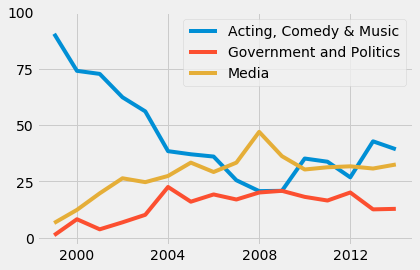

In [15]:
#Multiplying by 100 to have correct numbers


fig = plt.figure(figsize=(4,3))
plt.style.use('fivethirtyeight')

x = range(1999, 2015, 1)
y1 = oby['Acting, Comedy & Music'].multiply(100)
y2 = oby['Government and Politics'].multiply(100)
y3 = oby['Media'].multiply(100)

df2 = pd.DataFrame({'Acting, Comedy & Music': y1,
                    'Government and Politics' : y2,
                    'Media': y3 },
                   index=x)

ax = df2.plot.line()

ax.set(xticks=range(2000, 2015, 4), yticks=range(0, 110, 25));

#ax.text(0, 95, s="Who Got To Be On 'The Daily Show'?", fontsize=16, fontweight='bold')

#ax.text(0, 90, s="Occupation of guests, by year", fontsize=12);




<Figure size 1728x1296 with 0 Axes>

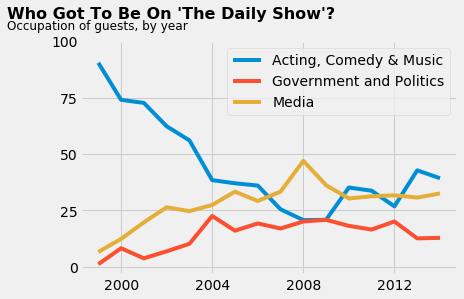

In [28]:

fig = plt.figure(figsize=(24,18))
plt.style.use('fivethirtyeight')

x = range(1999, 2015, 1)
y1 = oby['Acting, Comedy & Music'].multiply(100)
y2 = oby['Government and Politics'].multiply(100)
y3 = oby['Media'].multiply(100)

df2 = pd.DataFrame({'Acting, Comedy & Music': y1,
                    'Government and Politics' : y2,
                    'Media': y3 },
                   index=x)

ax = df2.plot.line()

ax.set(xticks=range(2000, 2015, 4), yticks=range(0, 120, 25));

ax.text(1995, 110.0, s="Who Got To Be On 'The Daily Show'?", fontsize=16, fontweight='bold')

ax.text(1995, 105.0, s="Occupation of guests, by year", fontsize=12);

#ax.set_title("Who Got To Be On 'The Daily Show'?", loc='left')


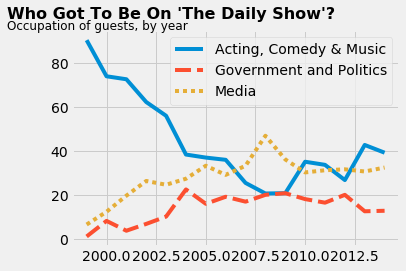

In [25]:
plt.style.use('fivethirtyeight')


x = range(1999, 2015, 1)
y1 = oby['Acting, Comedy & Music'].multiply(100)
y2 = oby['Government and Politics'].multiply(100)
y3 = oby['Media'].multiply(100)

df2 = pd.DataFrame({'Acting, Comedy & Music': y1,
                    'Government and Politics' : y2,
                    'Media': y3 },
                   index=x)

dshow = sns.lineplot(data=df2)

plt.text(x=1995, y=100, s="Who Got To Be On 'The Daily Show'?", fontsize=16, fontweight='bold')
plt.text(x=1995, y=95, s="Occupation of guests, by year", fontsize=12);

plt.tight_layout()

# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)

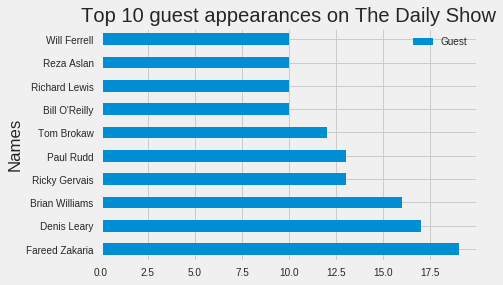

In [144]:
guests = df['Guest']

top10 = guests.value_counts()[:10]


df3 = guests.value_counts()[:10].to_frame()

df3.index.names = ['Names']

ax2 = df3.plot(kind='barh')

ax2.set(title='Top 10 guest appearances on The Daily Show');


Index(['Fareed Zakaria', 'Denis Leary', 'Brian Williams', 'Ricky Gervais',
       'Paul Rudd', 'Tom Brokaw', 'Bill O'Reilly', 'Richard Lewis',
       'Reza Aslan', 'Will Ferrell'],
      dtype='object')